In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import seaborn as sns
from matplotlib import pyplot as plt

### Load clustering results

In [ ]:
# Changed the folder from data to /Users/jenniferthem/Masterthesis_Data

In [7]:
# Umap results for precomputed metric
# dataframe
umap_precomputed_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed_df.pkl')
umap_precomputed = np.load('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed.npy')
# Umap results for precomputed metric with ROI labels
umap_roi_precomputed_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed_labeled.pkl')
# Umap results for euclidean metric with ROI labels
umap_roi_euclidean_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_euclidean_labeled.pkl')
# Umap results for euclidean metric
umap_euclidean = np.load('/Users/jenniferthem/Masterthesis/core/data/UMAP_euclidean.npy')

# HDBScan labels for precomputed metric
# array
hdbscan_labels_precomputed = np.load('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels.npy')
# dataframe
hdbscan_labels_precomputed_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels_precomputed_df.pkl')
# HDBScan labels for euclidean metric
hdbscan_labels_euclidean = np.load('/Users/jenniferthem/Masterthesis/core/data/HDBScan_euclidean_labels.npy')
hdbscan_labels_euclidean_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels_euclidean_df.pkl')
# UMAP precomputed metric + HDBScan labels
# dataframe
hdbscan_labeled_data_precomputed_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labeled_data_precomputed.pkl')
# UMAP euclidean metric + HDBScan labels
hdbscan_labeled_data_euclidean_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labeled_data_euclidean.pkl')

# ROI labels
roi_labels_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/roi_labels.pkl') # dataframe
# HDBScan labels in array format from precomputed
hdbscan_labels = np.load('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels.npy')

# Manhattan metric
clu_roi_data_manhattan = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_manhattan_df.pkl')
# Cosine metrix
clu_roi_data_cosine = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_cosine_df.pkl')

In [4]:
roi_labels_df

label
0         OFC1
1         OFC1
2         OFC1
3         OFC1
4         OFC1
...        ...
11874  Caudate
11875  Caudate
11876  Caudate
11877  Caudate
11878  Caudate

[11879 rows x 1 columns]

Creating seaborn custom made color palette

In [22]:
colors = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

In [73]:
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

## UMAP embedding with ROI labels

In [117]:
clustered = (hdbscan_labels >= 0)
clustered_euclidean = (hdbscan_labels_euclidean >= 0)

Precomputed metric

<IPython.core.display.Javascript object>


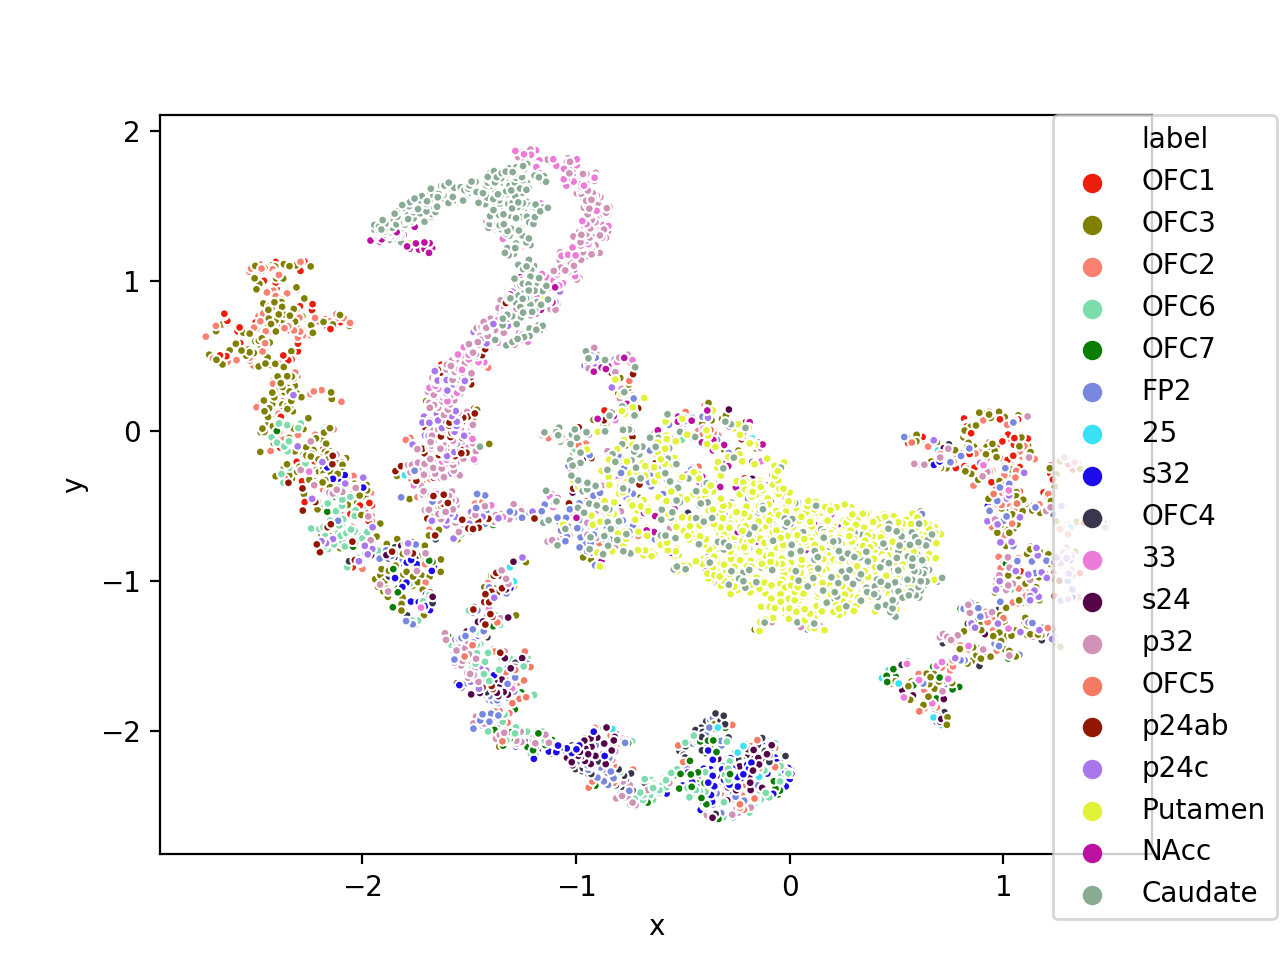

In [28]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='label', data=umap_roi_precomputed_df[clustered], s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)

<IPython.core.display.Javascript object>


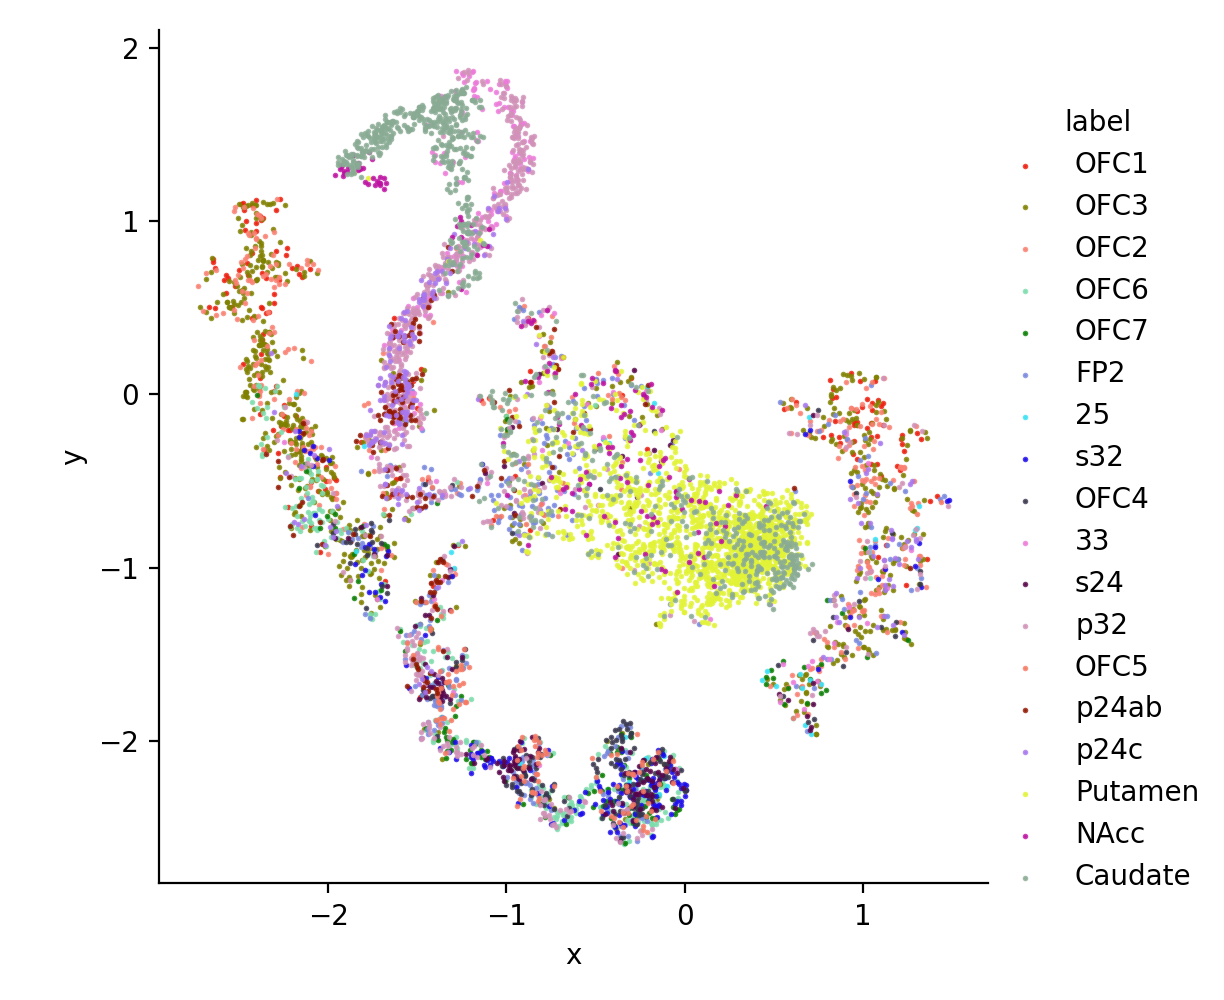

In [18]:
%matplotlib notebook
facet = sns.lmplot(data=umap_roi_precomputed_df[clustered], x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, scatter_kws={"s": 1})

Euclidean metric

<IPython.core.display.Javascript object>


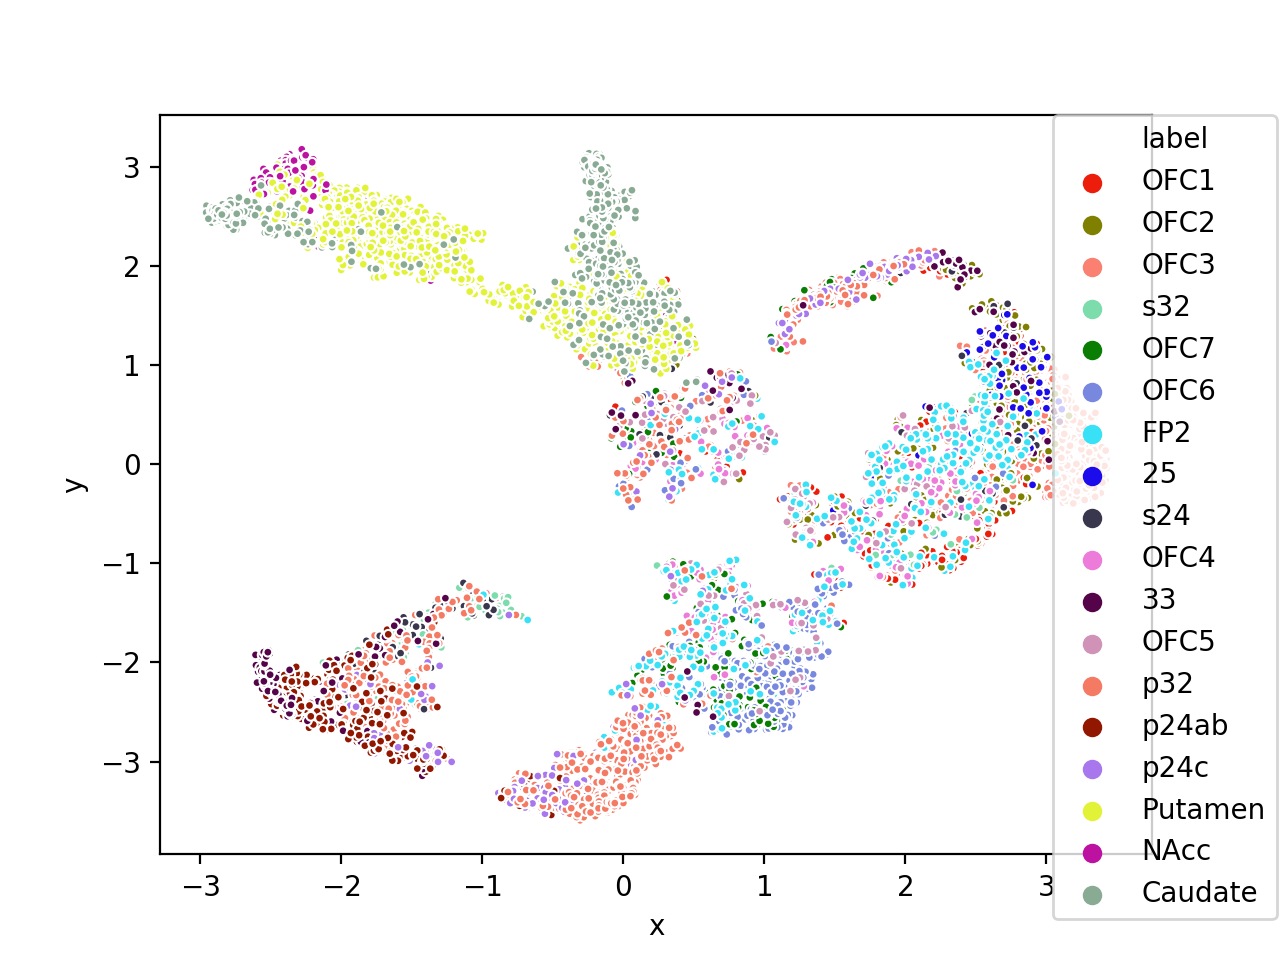

In [113]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='label', data=umap_roi_euclidean_df[clustered_euclidean], s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)

## Clustering HDBScan

#### Precomputed metric

In [63]:
hdbscan_labeled_data_precomputed_df.columns = ['x', 'y', 'class']

<IPython.core.display.Javascript object>


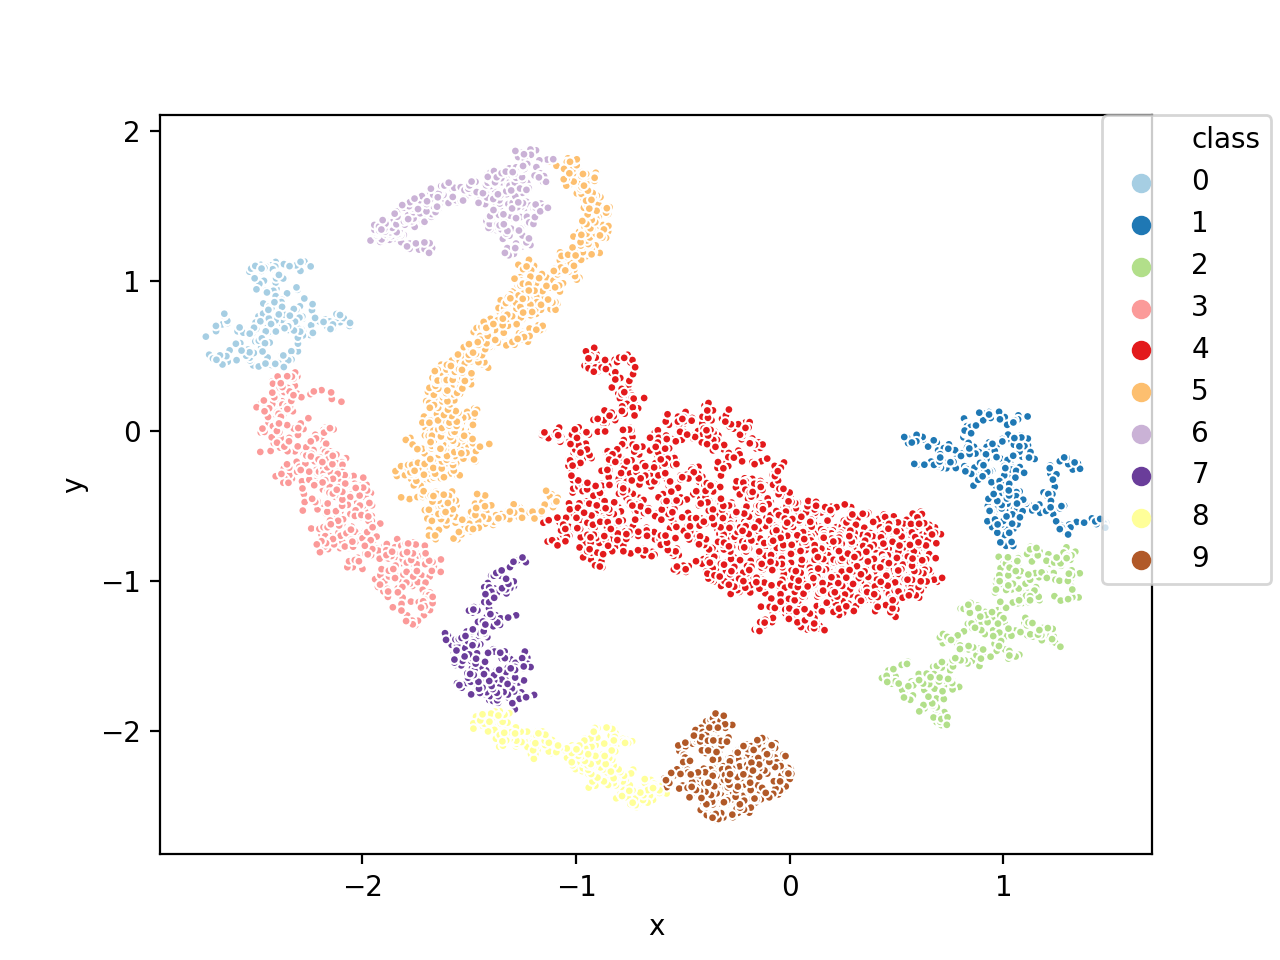

In [82]:
%matplotlib notebook
# presentation without the noise
sp = sns.scatterplot(x="x", y="y", hue='class', data=hdbscan_labeled_data_precomputed_df[clustered], legend='full', palette = 'Paired', s=10)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)

#### Euclidean metric

<IPython.core.display.Javascript object>


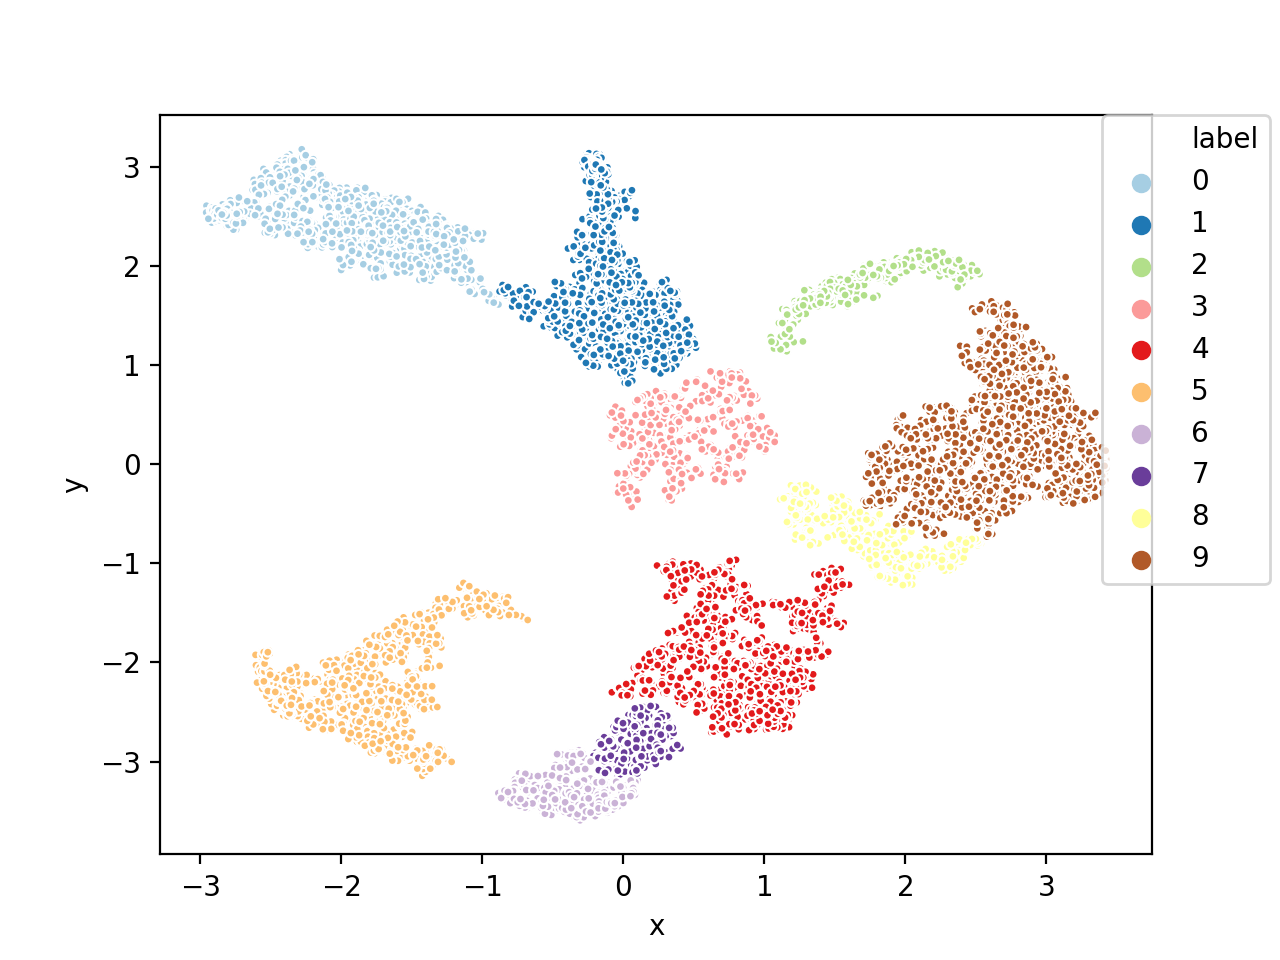

In [123]:
%matplotlib notebook
# presentation without the noise
sp = sns.scatterplot(x="x", y="y", hue='label', data=hdbscan_labeled_data_euclidean_df[clustered_euclidean], legend='full', palette = 'Paired', s=10)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)

<IPython.core.display.Javascript object>


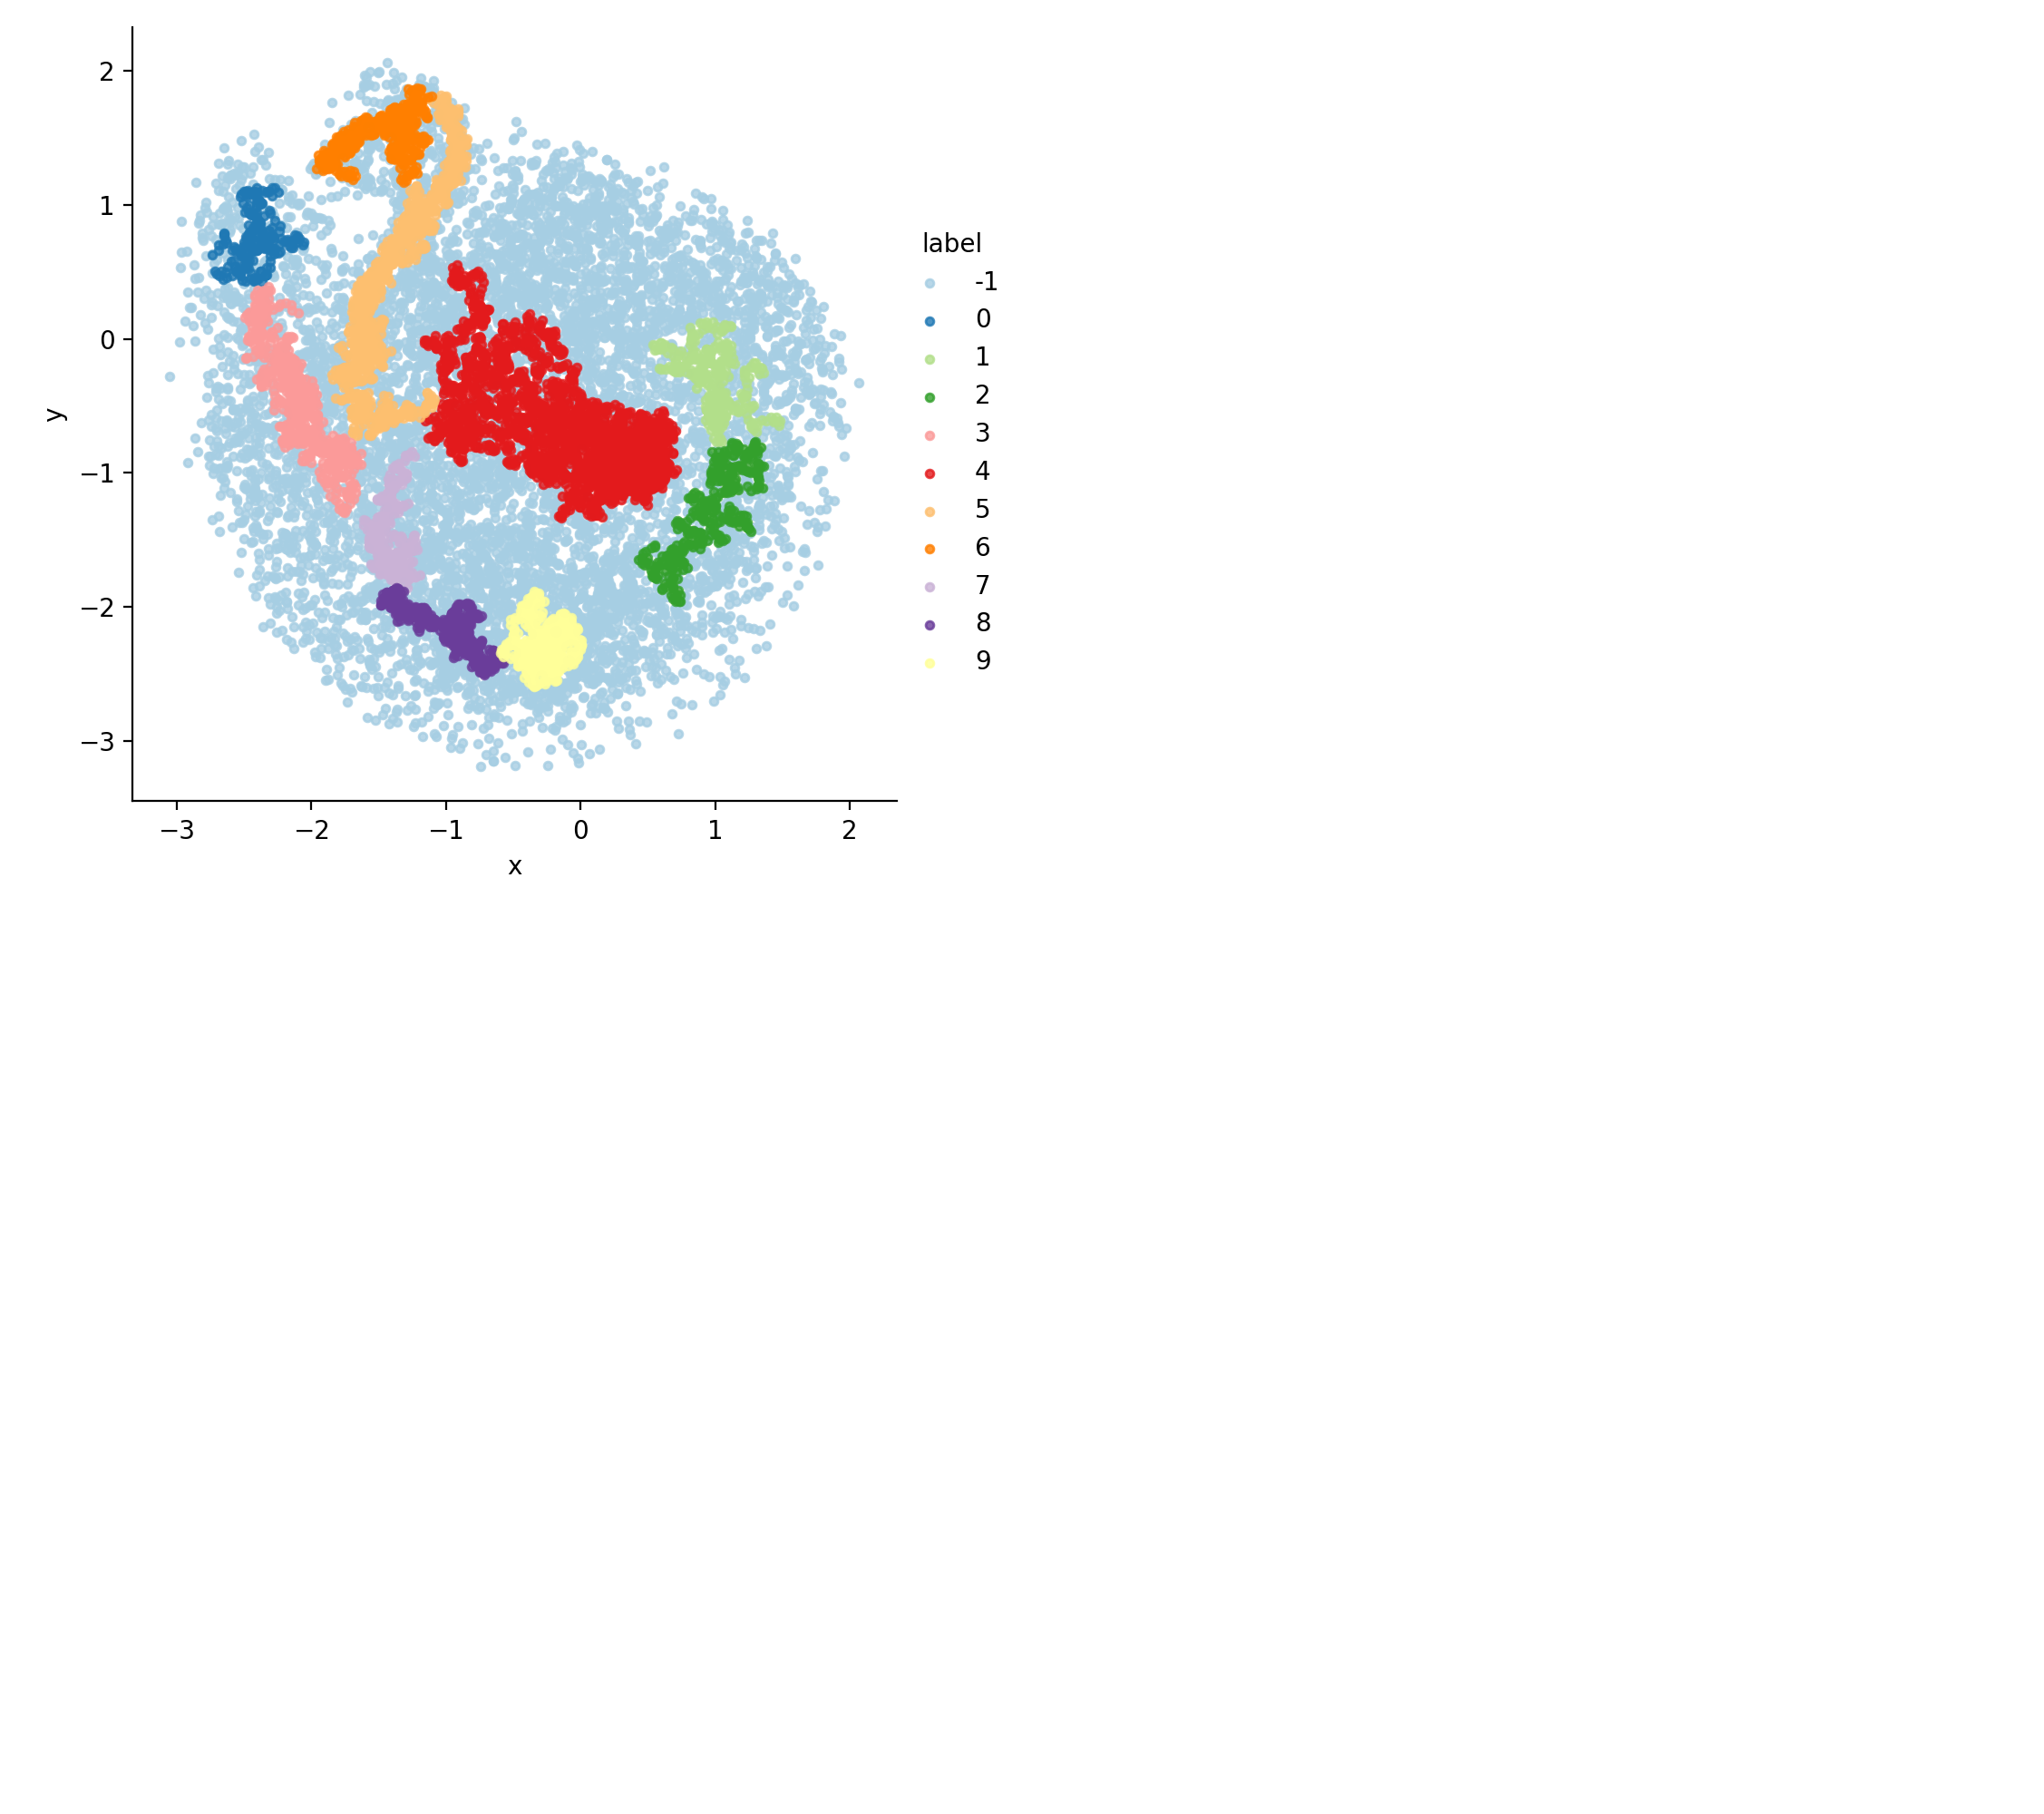

In [57]:
#%matplotlib notebook
# -1 is noise
facet = sns.lmplot(data=hdbscan_labeled_data_precomputed, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, scatter_kws={"s": 10}, palette = 'Paired')

### Counting ROI voxels in clusters

#### Precomputed

Building dataframe with UMAP results coordinates, HDBScan label and ROI label

In [36]:
clu_roi_data = pd.concat([hdbscan_labeled_data_precomputed_df, roi_labels_df], axis=1)
clu_roi_data.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
clu_roi_data.to_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data.pkl')

In [38]:
# dataframe with only clustered voxels
clu_roi_data[clustered]

x         y  HDBScanLabel      ROI
0     -2.477558  0.177693             3     OFC1
49    -2.346270  0.671817             0     OFC1
83    -2.402177  0.945285             0     OFC1
86    -2.103942  0.723528             0     OFC1
101   -1.525558  0.077626             5     OFC1
...         ...       ...           ...      ...
11872 -1.342714  0.746700             5  Caudate
11874 -1.154328  1.658735             6  Caudate
11875 -1.140663  1.658622             6  Caudate
11876 -1.194211  1.700096             6  Caudate
11877 -1.173898  1.688182             6  Caudate

[6299 rows x 4 columns]

In [51]:
# Extracting clusters - for precomputed metric we have 10 clusters
# 202voxels
clu_0 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==0]
# 269 voxels
clu_1 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==1]
# 303 voxels
clu_2 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==2]
# 560 voxels
clu_3 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==3]
# 2339 voxels
clu_4 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==4]
# 1023 voxels
clu_5 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==5]
# 432 voxels
clu_6 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==6]
# 276 voxels
clu_7 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==7]
# 368 voxels
clu_8 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==8]
# 497 voxels
clu_9 = clu_roi_data.loc[clu_roi_data['HDBScanLabel']==9]

In [207]:
# list of all clusters
clu_list_precomp = [clu_0, clu_1, clu_2, clu_3, clu_4, clu_5, clu_6, clu_7, clu_8, clu_9]

<IPython.core.display.Javascript object>


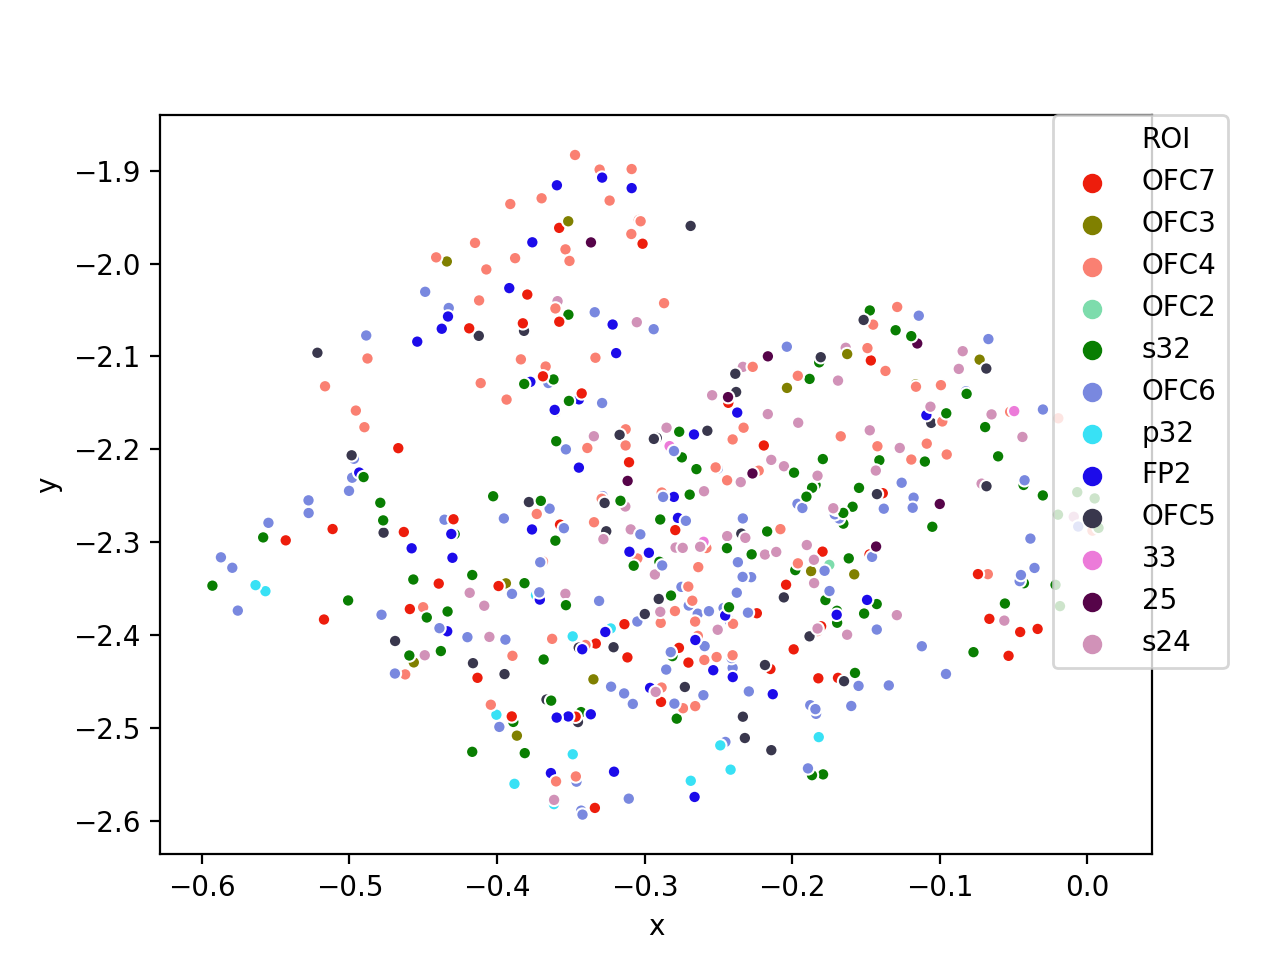

In [99]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='ROI', data=clu_9, legend='full', s=20)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/clu_9.png')

#### Euclidean 

In [124]:
# df of hdbscan labeled data combined with the ROI labels
clu_roi_data_eucl = pd.concat([hdbscan_labeled_data_euclidean_df, roi_labels_df], axis=1)
clu_roi_data_eucl.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
clu_roi_data_eucl.to_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_euclidean.pkl')

In [126]:
# Extracting clusters - for euclidean metric we have 10 clusters: 8288 voxels clustered
# 1316 voxels
clu_0_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==0]
# 1361 voxels
clu_1_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==1]
# 414 voxels
clu_2_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==2]
# 458 voxels
clu_3_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==3]
# 909 voxels
clu_4_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==4]
# 1002 voxels
clu_5_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==5]
# 432 voxels
clu_6_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==6]
# 278 voxels
clu_7_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==7]
# 415 voxels
clu_8_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==8]
# 1708 voxels
clu_9_eucl = clu_roi_data_eucl.loc[clu_roi_data_eucl['HDBScanLabel']==9]

In [204]:
clu_list_eucl = [clu_0_eucl, clu_1_eucl, clu_2_eucl, clu_3_eucl, clu_4_eucl, clu_5_eucl, clu_6_eucl, clu_7_eucl, clu_8_eucl, clu_9_eucl]

<IPython.core.display.Javascript object>


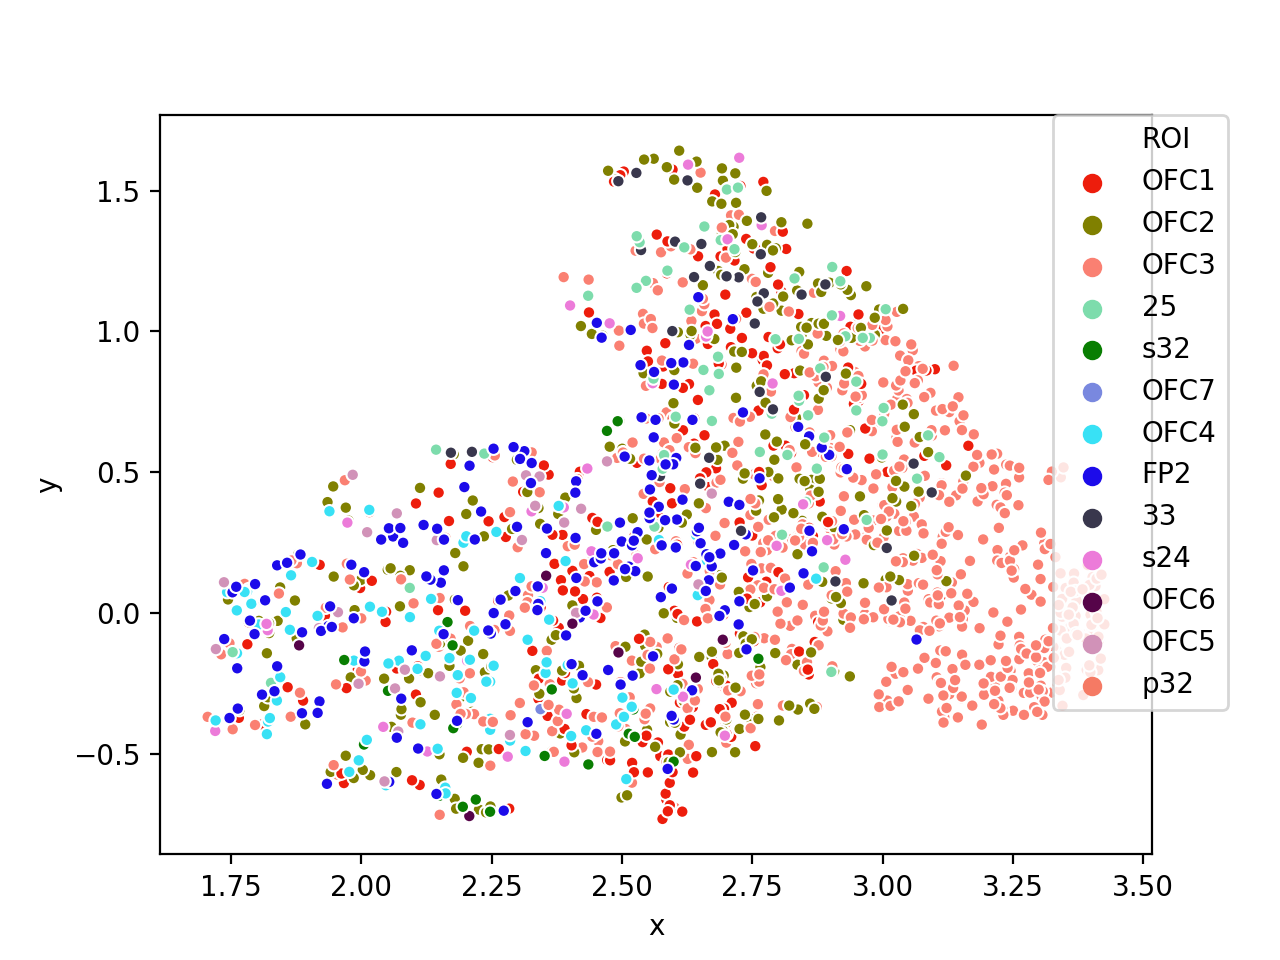

In [149]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='ROI', data=clu__eucl, legend='full', s=20)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/clu_9_eucl.png')

### Counting amount of regions in clusters

In [6]:
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

#### Precomputed

In [211]:
# define dictionary
cluster_pre_precomp = { 'clu_0': {}, 'clu_1': {}, 'clu_2': {}, 'clu_3': {}, 'clu_4': {}, 'clu_5': {}, 'clu_6': {}, 'clu_7': {}, 'clu_8': {}, 'clu_9': {}}
clu_it = 0
for id, curr_clu in cluster_pre_precomp.items():
    for entry in keys:
        clu = clu_list_precomp[clu_it]
        curr_clu[entry] = (clu.ROI.values == entry).sum()
    clu_it = clu_it+1    

cluster_roi_combined_precomp_df = pd.DataFrame.from_dict(cluster_pre_precomp, orient='index')
cluster_roi_combined_precomp_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/cluster_roi_combined_precomp_df.pkl')
cluster_roi_combined_precomp_df

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2  25  s24   33  p32  \
clu_0    47    57    98     0     0     0     0    0    0   0    0    0    0   
clu_1    46    61    98     2     7     0     0    5   18   2    1    2   15   
clu_2     4    59   109    15     4     1    18    9   22  14    8   14   28   
clu_3    33    70   243    19     0    88    15   22   12   2    6    2   16   
clu_4    13    22    50     3    22     3     2    0  104   6   16   19   71   
clu_5    11    23    27     3     1     3     1    1   35   1    1  138  458   
clu_6     0     0     0     0     0     0     0    0    0   0    0   36    7   
clu_7     3     4    15    11    41    33     8    6   42   2   34    3   40   
clu_8     0     0     5    44    39    72    31   40   46   3   37    1   50   
clu_9     0     1    12    87    39   100    49   87   44   8   54    3   13   

       p24ab  p24c  Putamen  NAcc  Caudate  
clu_0      0     0        0     0        0  
clu_1      0    12        0     0        0  
clu_2      1    27        0     0        0  
clu_3     16    16        0     0        0  
clu_4     26    13     1465    98      406  
clu_5     88   141        2    11       78  
clu_6      0     0        2    30      357  
clu_7     27     7        0     0        0  
clu_8      0     0        0     0        0  
clu_9      0     0        0     0        0

#### Euclidean

In [213]:
# define dictionary
cluster_pre_eucl = { 'clu_0': {}, 'clu_1': {}, 'clu_2': {}, 'clu_3': {}, 'clu_4': {}, 'clu_5': {}, 'clu_6': {}, 'clu_7': {}, 'clu_8': {}, 'clu_9': {}}
clu_it = 0
for id, curr_clu in cluster_pre_eucl.items():
    for entry in keys:
        clu = clu_list_eucl[clu_it]
        curr_clu[entry] = (clu.ROI.values == entry).sum()
    clu_it = clu_it+1    

pd.DataFrame.from_dict(cluster_pre_eucl, orient='index')
cluster_roi_combined_eucl_df = pd.DataFrame.from_dict(cluster_pre_eucl, orient='index')
cluster_roi_combined_eucl_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/cluster_roi_combined_eucl_df.pkl')
cluster_roi_combined_eucl_df


OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2  25  s24   33  p32  \
clu_0     0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_1    22    26    51     6     2     2    15    0    0   0    3   15   16   
clu_2    14    18   122     3     2     2    38    0    0   2    4   28  110   
clu_3    25     7    81    53    62    33    46    0   42   0   21   16   54   
clu_4    10     6    17    75    51   364   185    8  146   0    0    5   34   
clu_5     0     0    15     0     0     0     0  168    7   0   81  143  254   
clu_6     0     0     0     0     0     0     0    0    6   0    0    0  291   
clu_7     0     0     1     0     0     0     0    0   34   0    0    0  216   
clu_8   186    78    20    25    18    13     0    9   62   1    3    0    0   
clu_9   250   320   691    78    27     7     1   22  173  62   37   34    1   

       p24ab  p24c  Putamen  NAcc  Caudate  
clu_0      0     0      951   110      255  
clu_1      0     9      608    13      573  
clu_2      0    71        0     0        0  
clu_3      0    16        0     0        2  
clu_4      0     8        0     0        0  
clu_5    287    47        0     0        0  
clu_6     27   108        0     0        0  
clu_7      0    27        0     0        0  
clu_8      0     0        0     0        0  
clu_9      0     0        0     0        0

#### Manhattan metric

In [11]:
# Extracting clusters - for euclidean metric we have 10 clusters: 8288 voxels clustered
clu_0_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==0]
clu_1_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==1]
clu_2_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==2]
clu_3_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==3]
clu_4_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==4]
clu_5_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==5]
clu_6_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==6]
clu_7_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==7]
clu_8_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==8]
clu_9_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==9]
clu_10_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==10]
clu_11_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==11]
clu_12_manh = clu_roi_data_manhattan.loc[clu_roi_data_manhattan['HDBScanLabel']==12]
clu_list_manh = [clu_0_manh, clu_1_manh, clu_2_manh, clu_3_manh, clu_4_manh, clu_5_manh, clu_6_manh, clu_7_manh, clu_8_manh, clu_9_manh, clu_10_manh, clu_11_manh, clu_12_manh]


In [12]:
# define dictionary
cluster_pre_manh = { 'clu_0': {}, 'clu_1': {}, 'clu_2': {}, 'clu_3': {}, 'clu_4': {}, 'clu_5': {}, 'clu_6': {}, 'clu_7': {}, 'clu_8': {}, 'clu_9': {}, 'clu_10': {}, 'clu_11': {}, 'clu_12': {}}
clu_it = 0
for id, curr_clu in cluster_pre_manh.items():
    for entry in keys:
        clu = clu_list_manh[clu_it]
        curr_clu[entry] = (clu.ROI.values == entry).sum()
    clu_it = clu_it+1    

pd.DataFrame.from_dict(cluster_pre_manh, orient='index')
cluster_roi_combined_manh_df = pd.DataFrame.from_dict(cluster_pre_manh, orient='index')
cluster_roi_combined_manh_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/cluster_roi_combined_manhattan_df.pkl')
cluster_roi_combined_manh_df

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2  25  s24   33  p32  \
clu_0      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_1      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_2      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_3      0     0     0     0     0     0     0    2    0   0    3  202    5   
clu_4      0     0    41     5     0     0     0  202   23   1   94   39  254   
clu_5      0     0     0     0     0     0     0    0    3   0    0    0  218   
clu_6      0     0     0     0     0     0     0    0   28   0    0    0  176   
clu_7      0     0    13    66    48   321   155    0   26   0    0    4    8   
clu_8      9    15   118     3     1     1    34    0    1   2    6   37  108   
clu_9      0     0    64    20    18     5    37    0    6   0    6   14   51   
clu_10   123   111    93    91    31    21     2    2   85   2   11    2    1   
clu_11    45    52   156     3     0     0     0    0   43  12    7    9    0   
clu_12    42    73    47     0     0     0     0    0    6  26    4   12    0   

        p24ab  p24c  Putamen  NAcc  Caudate  
clu_0       0     0      116    84        2  
clu_1       0     0      308     1      244  
clu_2       0     0      687     6       29  
clu_3     141     1        0     0        0  
clu_4     122    34        0     0        0  
clu_5       7    54        0     0        0  
clu_6       0    13        0     0        0  
clu_7       0     2        0     0        0  
clu_8       0    70        0     0        0  
clu_9       0    14        0     0        0  
clu_10      0     0        0     0        0  
clu_11      0     0        0     0        0  
clu_12      0     0        0     0        0

#### Cosine metric

In [13]:
# Extracting clusters - for euclidean metric we have 10 clusters: 8288 voxels clustered
clu_0_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==0]
clu_1_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==1]
clu_2_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==2]
clu_3_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==3]
clu_4_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==4]
clu_5_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==5]
clu_6_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==6]
clu_7_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==7]
clu_8_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==8]
clu_9_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==9]
clu_10_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==10]
clu_11_cos = clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==11]
clu_12_cos= clu_roi_data_cosine.loc[clu_roi_data_cosine['HDBScanLabel']==12]
clu_list_cos = [clu_0_cos, clu_1_cos, clu_2_cos, clu_3_cos, clu_4_cos, clu_5_cos, clu_6_cos, clu_7_cos, clu_8_cos, clu_9_cos, clu_10_cos, clu_11_cos, clu_12_cos]


In [14]:
# define dictionary
cluster_pre_cos = { 'clu_0': {}, 'clu_1': {}, 'clu_2': {}, 'clu_3': {}, 'clu_4': {}, 'clu_5': {}, 'clu_6': {}, 'clu_7': {}, 'clu_8': {}, 'clu_9': {}, 'clu_10': {}, 'clu_11': {}, 'clu_12': {}}
clu_it = 0
for id, curr_clu in cluster_pre_cos.items():
    for entry in keys:
        clu = clu_list_cos[clu_it]
        curr_clu[entry] = (clu.ROI.values == entry).sum()
    clu_it = clu_it+1    

pd.DataFrame.from_dict(cluster_pre_cos, orient='index')
cluster_roi_combined_cos_df = pd.DataFrame.from_dict(cluster_pre_cos, orient='index')
cluster_roi_combined_cos_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/cluster_roi_combined_cosine_df.pkl')
cluster_roi_combined_cos_df

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2  25  s24   33  p32  \
clu_0      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_1      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_2      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_3      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_4      0     0     0     0     0     0     0    0    0   0    0    0    0   
clu_5      9    11    16   106   126   439   207    1   96   0    0    0    3   
clu_6      0     0     5     0     0     2     0    0    0   0    0  192    0   
clu_7    233    98    11     1     3     0     0    0    4   0    0    0    0   
clu_8      0     3     7     8     1     0    12  127   12   1   93   37  187   
clu_9      0     1     4     0     1    13     9    0   97   0    1    5  726   
clu_10     0     0    14    13     1     2     6    5    8   0   21   39   95   
clu_11    14   107   294    17    11     4     0    1   91   2   11    2    1   
clu_12    48    91   205     6    13     0     0    0   33  27    6    5    1   

        p24ab  p24c  Putamen  NAcc  Caudate  
clu_0       0     0       57    60      708  
clu_1       0     0      174    78        6  
clu_2       0     0        9     5      273  
clu_3       0     0      271     0        0  
clu_4       0     0      535     0        0  
clu_5       0     0        0     0        0  
clu_6       2     1        0     0        0  
clu_7       0     0        0     0        0  
clu_8     119    20        0     0        0  
clu_9      84   243        0     0        0  
clu_10     98    22        0     0        0  
clu_11      0     0        0     0        0  
clu_12      0     0        0     0        0